In [2]:
import numpy as np
import matplotlib.pyplot as plt

from compression import calculateCompRatio, compress_dataset
from utils.personal_utils import load_dataset, compute_avg_rmse_of_dataset

import os
import pywt
import matplotlib.pyplot as plt

import time


In [4]:
all_datasets_dic = {
    'AppliancesEnergy':   '/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TEST.ts',
    'NewsTitleSentiment': '/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TEST.ts',
    'BenzeneConcentration':'/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TEST.ts',
    'BeijingPM25Quality': '/home/sim/Desktop/TS Extrinsic Regression/data/BeijingPM25Quality_TEST.ts',

    'IEEEPPG':            '/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TEST.ts',
    'FloodModeling1':     '/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TEST.ts',
    'HouseholdPowerConsumption1': '/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TEST.ts',
    'Covid3Month':              "/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TEST.ts"

}

all_datasets = [
    '/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/BeijingPM25Quality_TEST.ts',
    
    '/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TEST.ts'
]


#all_datasets = ['/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TEST.ts']



dataset_params = {
    'AppliancesEnergy':          {'block_size': 1008, 'num_dim': 24, 'len_ts': 144},
    'BeijingPM25Quality':        {'block_size': 1008, 'num_dim': 9, 'len_ts': 24},
    'IEEEPPG':                   {'block_size': 1000, 'num_dim': 5, 'len_ts': 1000},
    'FloodModeling1':           {'block_size': 1064, 'num_dim': 1, 'len_ts': 266},



    'Covid3Month':               {'block_size': 1008, 'num_dim': 1, 'len_ts': 84}, 
    'BenzeneConcentration':      {'block_size': 960, 'num_dim': 8, 'len_ts': 240},
    'NewsTitleSentiment':        {'block_size': 1008, 'num_dim': 3, 'len_ts': 144},
    'HouseholdPowerConsumption1':{'block_size': 1440, 'num_dim': 5, 'len_ts': 1440},
    
}


Time taken for dataset AppliancesEnergy: 0.04 seconds
Time taken for dataset NewsTitleSentiment: 0.07 seconds
Time taken for dataset BenzeneConcentration: 0.05 seconds
Time taken for dataset BeijingPM25Quality: 0.02 seconds
Time taken for dataset IEEEPPG: 0.04 seconds
Time taken for dataset FloodModeling1: 0.02 seconds
Time taken for dataset HouseholdPowerConsumption1: 0.03 seconds
Time taken for dataset Covid3Month: 0.02 seconds


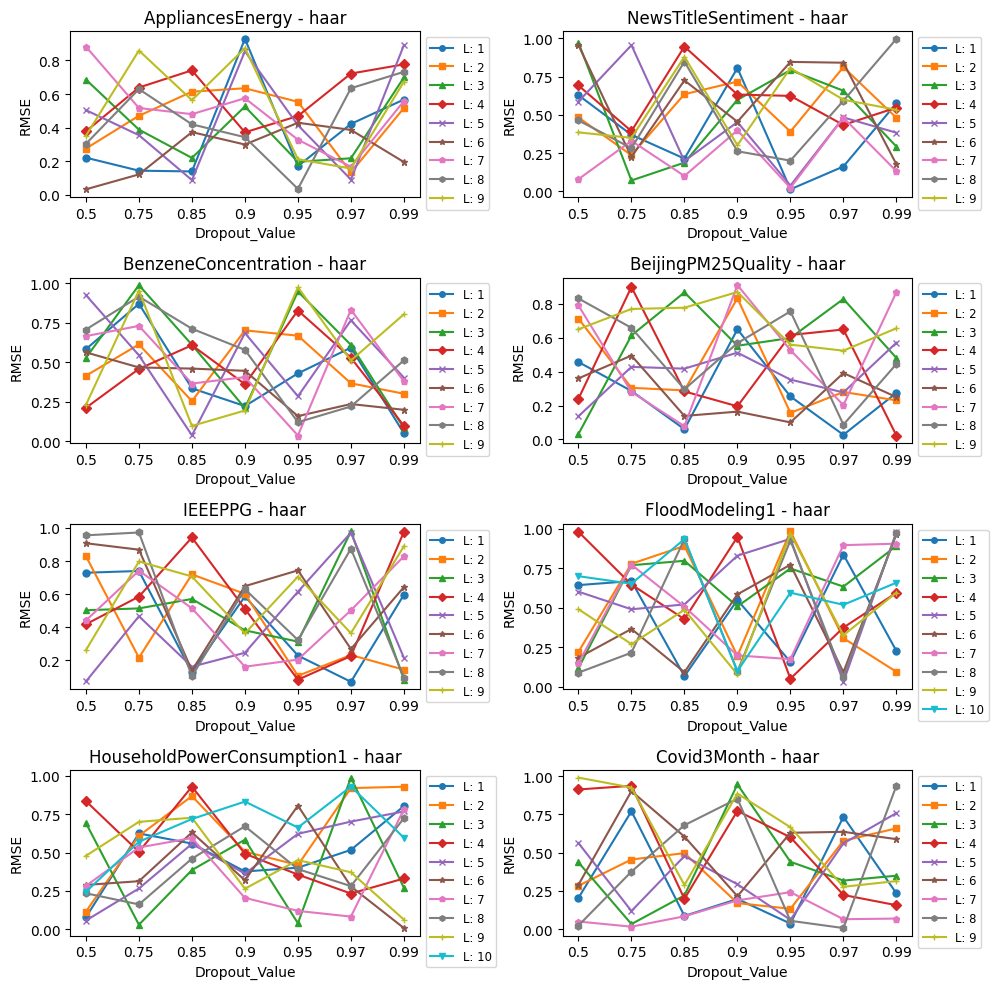

In [14]:
# Plot with x ticks as the dropout values -> to undo delete x ticks things and put into plot as first argument the dropout_values
# -> Other possibility to plot: legend outside the plot, thinner lines -> adapt for situation, ask chatgpt and also understand it! It is kinda easy!


wavelet = 'haar'


markers = ['o', 's', '^', 'D', 'x', '*', 'p', 'h', '+', 'v']

dropout_values = [0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]


custom_x_ticks = np.arange(len(dropout_values))
plt.figure(figsize=(10, 10))  # Adjust the width and height as needed
for subplot_id, dataset_path in enumerate(all_datasets):
    start_time = time.time()
    dataset_id = os.path.basename(dataset_path).split('_')[0]
    dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + dataset_id + '_TEST.npy')

   
    plt.subplot(4,2, subplot_id + 1)

    max_level = pywt.dwt_max_level(dataset_params[dataset_id]['block_size'], wavelet)

    for level in range(1, max_level + 1):
        rmses = np.zeros_like(dropout_values)

        for i, step in enumerate(dropout_values):
            #decomp_dataset_array = compress_dataset(dataset_array.copy(), dataset_id, andDecompress=True, compression_type="dwt", compression_param=step, wavelet=wavelet, level=level)
            #rmses[i] = compute_avg_rmse_of_dataset(dataset_array, decomp_dataset_array)
            rmses[i] = np.random.rand()


        marker_style = markers[level-1]
        plt.plot(custom_x_ticks, rmses, markersize=5, marker=marker_style, label=f"L: {level}")

    plt.xlabel("Dropout_Value")
    plt.ylabel("RMSE")
    plt.title(f"{dataset_id} - {wavelet}")
    plt.xticks(custom_x_ticks, dropout_values)
    plt.legend(fontsize="small", loc='upper left', bbox_to_anchor=(1, 1), markerscale=0.8)
    
    end_time = time.time()
    print(f"Time taken for dataset {dataset_id}: {end_time - start_time:.2f} seconds")
plt.tight_layout()


plt.show()

Time taken for dataset AppliancesEnergy: 0.94 seconds
Time taken for dataset NewsTitleSentiment: 53.70 seconds
Time taken for dataset BenzeneConcentration: 65.14 seconds
Time taken for dataset BeijingPM25Quality: 12.90 seconds
Time taken for dataset IEEEPPG: 38.47 seconds
Time taken for dataset FloodModeling1: 0.33 seconds
Time taken for dataset HouseholdPowerConsumption1: 22.99 seconds
Time taken for dataset Covid3Month: 0.05 seconds


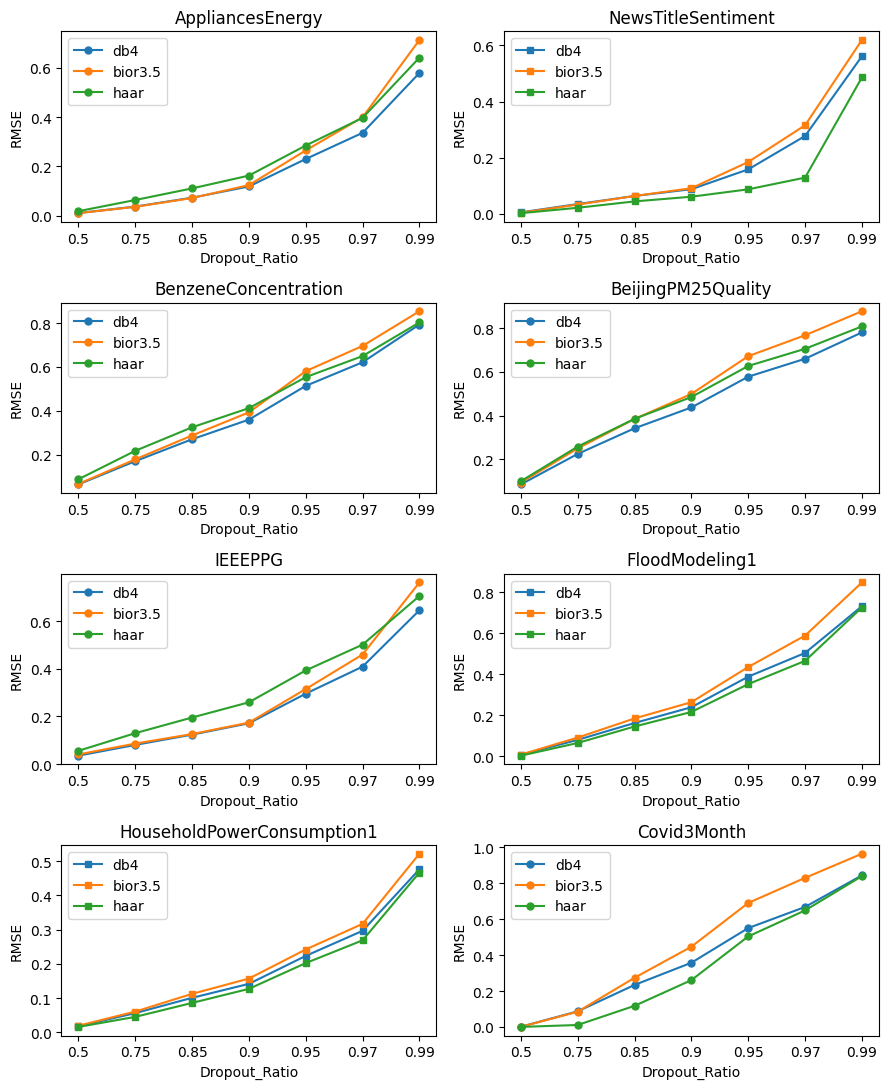

In [9]:
# Plot each Wavelet with best level into each Dataset to see overall best wavelet

markers = ['o', 's', '^', 'D', 'x', '*', 'p', 'h', '+', 'v']
wavelet_type =["db4", "bior3.5", "haar"]
dropout_values =  [0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]


plt.figure(figsize=(9,11))
for subplot_id, dataset_path in enumerate(all_datasets):
    plt.subplot(4,2,subplot_id+1)

    start_time = time.time()

    dataset_id = os.path.basename(dataset_path).split('_')[0]
    max_level = pywt.dwt_max_level(dataset_params[dataset_id]['block_size'], wavelet)
    dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + dataset_id + '_TEST.npy')
    custom_x_ticks = np.arange(len(dropout_values))

    m_id = 0
    for wavelet in wavelet_type:
        rmses = np.empty_like(dropout_values)

        # Each level for wavelet
        level = max_level
        if dataset_id == "NewsTitleSentiment":
            level = 1

        for i,step in enumerate(dropout_values):
            decomp_dataset_array = compress_dataset(dataset_array.copy(), dataset_id, andDecompress= True, compression_type= "dwt", compression_param=step, wavelet= wavelet, level = level)
            rmses[i]= compute_avg_rmse_of_dataset(dataset_array, decomp_dataset_array)
            #rmses[i] = np.random.rand()


           
        marker_style = markers[m_id]
        m_id = m_id +1
        plt.plot(custom_x_ticks, rmses,markersize=5, marker=marker_style, label= wavelet)


    plt.xlabel("Dropout_Ratio")
    plt.ylabel("RMSE")
    plt.title(f"{dataset_id}")
    plt.xticks(custom_x_ticks, dropout_values)
    plt.legend()

    end_time = time.time()
    print(f"Time taken for dataset {dataset_id}: {end_time - start_time:.2f} seconds")
    #plt.grid(color='gray', linestyle='--', linewidth=0.5)
    
plt.tight_layout()
    
    


#plt.suptitle("Dropout_Ratio vs RMSE of 3 Wavelets")

#-> Go with db4